In [ ]:
import numpy as np
from skimage import feature as skif
from matplotlib import pyplot as plt
import cv2
def get_pixel(img, center, x, y):    
    new_value = 0
      
    try:
        # If local neighbourhood pixel 
        # value is greater than or equal
        # to center pixel values then 
        # set it to 1
        if img[x][y] >= center:
            new_value = 1
              
    except:
        # Exception is required when 
        # neighbourhood value of a center
        # pixel value is null i.e. values
        # present at boundaries.
        pass
      
    return new_value

def lbp_8_1(img, x, y):
   
    center = img[x][y]
   
    val_ar = []
     
    # top_left
    val_ar.append(get_pixel(img, center, x-1, y-1))
      
    # top
    val_ar.append(get_pixel(img, center, x-1, y))
      
    # top_right
    val_ar.append(get_pixel(img, center, x-1, y + 1))
      
    # right
    val_ar.append(get_pixel(img, center, x, y + 1))
      
    # bottom_right
    val_ar.append(get_pixel(img, center, x + 1, y + 1))
      
    # bottom
    val_ar.append(get_pixel(img, center, x + 1, y))
      
    # bottom_left
    val_ar.append(get_pixel(img, center, x + 1, y-1))
      
    # left
    val_ar.append(get_pixel(img, center, x, y-1))
       
    # Now, we need to convert binary
    # values to decimal
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
   
    val = 0
      
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
          
    return val

def lbp_16_2(img, x, y):
   
    center = img[x][y]
   
    val_ar = []
    val_ar.append(get_pixel(img, center, x-2, y-2))
    # top_left
    val_ar.append(get_pixel(img, center, x-2, y-1))
      
    # top
    val_ar.append(get_pixel(img, center, x-2, y))
      
    # top_right
    val_ar.append(get_pixel(img, center, x-2, y + 1))
    val_ar.append(get_pixel(img, center, x-2, y+2))
    # right
    val_ar.append(get_pixel(img, center, x-1, y + 2))
    val_ar.append(get_pixel(img, center, x, y+2))
    # bottom_right
    val_ar.append(get_pixel(img, center, x+1, y+2))
    val_ar.append(get_pixel(img, center, x + 2, y + 2))
    val_ar.append(get_pixel(img, center, x+2, y+1))
    val_ar.append(get_pixel(img, center, x+2, y))
    # bottom
    val_ar.append(get_pixel(img, center, x+2, y-1))
      
    # bottom_left
    val_ar.append(get_pixel(img, center, x + 2, y-2))
      
    # left
    val_ar.append(get_pixel(img, center, x+1, y-2))
    val_ar.append(get_pixel(img, center, x, y-2))
    val_ar.append(get_pixel(img, center, x-1, y-2))
 
   
    val = 0
    power_val = 0  
    for i in range(len(val_ar)):
        power_val = 2**i
        val += val_ar[i] * power_val
          
    return val    

def lbp_8_2(img, x, y):
   
    center = img[x][y]
   
    val_ar = []
    val_ar.append(get_pixel(img, center, x-2, y-2))
    # top_left
   
      
    # top
    val_ar.append(get_pixel(img, center, x-2, y))
      
    # top_right
  
    val_ar.append(get_pixel(img, center, x-2, y+2))
    # right
   
    val_ar.append(get_pixel(img, center, x, y+2))
    # bottom_right
  
    val_ar.append(get_pixel(img, center, x + 2, y + 2))
   
    val_ar.append(get_pixel(img, center, x+2, y))
    # bottom
   
      
    # bottom_left
    val_ar.append(get_pixel(img, center, x + 2, y-2))
      
    # left
 
    val_ar.append(get_pixel(img, center, x, y-2))
   
    val = 0
    power_val = 0  
    for i in range(len(val_ar)):
        power_val = 2**i
        val += val_ar[i] * power_val
          
    return val


def lbp_histogram(image,P,R):
  
  resize_image=cv2.resize(image,(64,64), cv2.INTER_AREA)
  (height,width) = resize_image.shape
  lbp = np.zeros((height, width),np.uint8)      
  for i in range(0, height):
    for j in range(0, width):
      if (P==8 & R==1):
        lbp[i,j] = lbp_8_1(image, i, j) # lbp.shape is equal image.shape
        hist = cv2.calcHist(lbp,[0],None,[531],[0,256])

      elif (P==8 & R==2):
        lbp[i,j] = lbp_8_2(image, i, j) # lbp.shape is equal image.shape
        hist = cv2.calcHist(lbp,[0],None,[59],[0,256])

      else:
        lbp[i,j] = lbp_16_2(image, i, j) # lbp.shape is equal image.shape
        hist = cv2.calcHist(lbp,[0],None,[243],[0,256])
  
  
  return hist


def save_features(file_list,file_name):
    feature_label = []
    for line in open(file_list):
        image_path = line.strip().split(' ')[0]
        label = line.strip().split(' ')[1]
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        h1 = lbp_histogram(image,8,1)
        h2 = lbp_histogram(image,8,2) 
        h3 = lbp_histogram(image,16,2) 
        feature = np.concatenate((h1,h2,h3))
        feature_label.append(np.append(feature,np.array(label)))
    np.save(file_name,np.array(feature_label))
if __name__ == "__main__":
  #save_features("/content/train.txt","train_feature.npy")
  save_features("/content/test.txt","test_feature.npy")
  

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix,roc_curve, auc
import matplotlib.pyplot as plt 
def metric(predict_proba,labels):
    predict =  np.greater(predict_proba[:,1],0.5)
    tn, fp, fn, tp = confusion_matrix(labels,predict).flatten()
    acc = (tp+tn)/(tp+tn+fp+fn)
    far = fp / (fp + tn) # apcer
    frr = fn / (tp + fn) # bpcer
    hter=(far+frr) / 2 # acer

    fpr, tpr, threshold = roc_curve(labels, predict_proba[:,1])
    auc_v = auc(fpr, tpr) # area under curve
    dist = abs((1-fpr) - tpr)
    eer =fpr[np.argmin(dist)] 
    plt.plot(fpr, tpr, label='area under curve(auc): %0.2f' % auc_v)
    plt.plot([0, 1], [1, 0])
    plt.plot([eer, eer], [0,tpr[np.argmin(dist)]],label = '@EER',linestyle='--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend()
    plt.savefig("roc.png")
    return acc,eer,hter

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1
 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1]
test acc is:0.905405 eer is:0.013514 hter is:0.094595
[['real' 'real' 'real' 'real' 'real' 'real' 'real' 'real']
 ['real' 'real' 'real' 'real' 'real' 'real' 'real' 'real']
 ['real' 'real' 'real' 'real' 'real' 'real' 'real' 'real']
 ['real' 'real' 'real' 'real' 'real' 'real' 'real' 'real']
 ['real' 'real' 'real' 'real' 'real' 'real' 'real' 'real']
 ['real' 'real' 'real' 'real' 'real' 'real' 'real' 'real']
 ['real' 'real' 'real' 'real' 'real' 'real' 'real' 'real']
 ['real' 'real' 'real' 'real' 'real' 'real' 'real' 'real']
 ['real' 'real' 'real' 'real' 'real' 'real' 'real' 'real']
 ['real' 'real' 'spoof' 'real' 'real' 'spoof' 'real' 'spoof']
 ['spoof' 'spoof' 'spoof' 'spoof' 'spoof' 'real' 're

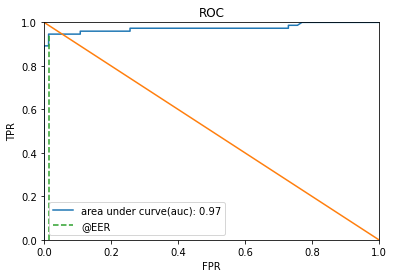

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.externals import joblib
def load_feature_label(file_name):
    feature_label = np.load(file_name)
    return feature_label[:,:-1],feature_label[:,-1].astype(np.uint8)
def train():
    train_feature,train_label = load_feature_label("train_feature.npy")
    model = SVC(kernel='rbf', C=1, gamma=0.04, class_weight='balanced', probability=True)
    model.fit(train_feature, train_label)
    joblib.dump(model, "./model.m")
    predict_proba = model.predict_proba(train_feature)
    predict = model.predict(train_feature)
    acc,eer,hter = metric(predict_proba,train_label)
    print("train acc is:%f eer is:%f hter is:%f"%(acc,eer,hter))
def test():
    categories = ['real','spoof']
    test_feature,test_label = load_feature_label("test_feature.npy")
    model = joblib.load("./model.m")
    predict_proba = model.predict_proba(test_feature)
    predict = model.predict(test_feature)
    print(predict)
    acc,eer,hter = metric(predict_proba,test_label)
    print("test acc is:%f eer is:%f hter is:%f"%(acc,eer,hter))
    #print(predict[9])
    b=len(predict)
    a=[]
    for i in range(b):
      if (predict[i]==0):
        a.append(categories[0])
      else:
        a.append(categories[1])
    a=np.resize(a,(15,8))
    print(a)


if __name__ == "__main__":
   #train()
   test()
    
   